# First print your name in the cell below then save this file. (or something nice about your instructor)

In [3]:
# In this cell print your name 
print("Hussam is very smart!")


Hussam is very smart!


# Data wrangling with Pandas exercise
* For this exercise we will be using the `listings.csv` data file.

In [4]:
import pandas as pd
import numpy as np

# Load in the data file using `pd.read_csv()`

In [5]:
# Load data here
df = pd.read_csv("data/listings.csv")
df.head(20)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.89,1,0
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,140,1,161,2019-07-29,1.21,4,274
7,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.49,1,178
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,88,4,180,2020-03-18,1.31,3,344
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,123,2019-12-09,0.90,1,365


## Exercise 2 - Filtering

Return the following subsets of the dataframe.

1. How many listings are there with a price less than 100? 


2. Find how many listings there are in just Brooklyn.


3. Find how many listings there are in Brooklyn with a price less than 100.


4. Using `.isin()` select anyone that has the host name of Michael, David, John, and Daniel.


5. Create a new column called `adjusted_price` that has $100 added to every listing in Williamsburg.  The prices for all other listings should be the same as the were before. 


6. What % of the rooms are private, and what % of the rooms are shared.  
    * Hint, use `.value_counts()`


In [6]:
# 1. How many listings are there with a price less than 100? 
c1 = df['price'] < 100
c1.sum()



22778

In [7]:
# 2. Make a new DataFrame of listings in Brooklyn named `df_bk` 
# and find how many listings in just Brooklyn.
c2 = df['neighbourhood_group'] == 'Brooklyn'
df_bk = df[c2]

# made a new df that has the neighborhood column be brooklyn, then shape[0] = rows
numberOfListingsBK = df_bk.shape[0]
print(numberOfListingsBK)


18632


In [8]:
# 3. Find how many listings there are in Brooklyn with a price less than 100.
c3 = c1 & c2
df_bkCheap = df[c3]
print(df_bkCheap.shape[0])




10473


In [9]:
# 4. Using `.isin()` select anyone that has the host name of Michael, David, John, and Daniel.
# How many total are there that have those names
hosts = ["Michael","David","John","Daniel"]
c4 = df["host_name"].isin(hosts)
print(df[c4].shape[0])



1258


In [10]:
# 5. Create a new column called `adjusted_price` that has $100 added to every listing in Williamsburg.  
# The prices for all other listings should be the same as the were before. 
c5 = df["neighbourhood"] == 'Williamsburg'
df['adjusted_price'] = np.where(c5, df['price']+100, df['price'])
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,adjusted_price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,175
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,75
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,60
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,175
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,65


In [11]:
# 6. What % of the rooms are private, and what % of the rooms are shared.  
room_percents = df['room_type'].value_counts(normalize=True) * 100
print(room_percents)


private = room_percents.get('Private room', 0)
shared = room_percents.get('Shared room', 0)

print(f"Percentage of private rooms: {private:.2f}%")
print(f"Percentage of shared rooms: {shared:.2f}%")


room_type
Entire home/apt    51.578653
Private room       45.444581
Shared room         2.121349
Hotel room          0.855417
Name: proportion, dtype: float64
Percentage of private rooms: 45.44%
Percentage of shared rooms: 2.12%


# Exercise 3 - Grouping

1. Using `groupby`, count how many listings are in each neighbourhood_group.


2. Using `groupby`, find the mean price for each of the neighbourhood_groups. 


3. Using `groupby` and `.agg()`, find the min and max price for each of the neighbourhood_groups. 


4. Using `groupby`, find the median price for each room type in each neighbourhood_group.


5. Using `groupby` and `.agg()`, find the count, min, max, mean, median, and std of the prices for each room type in each neighbourhood_group.

In [12]:
# 1. Using `groupby`, count how many listings are in each neighbourhood_group.
gb = df.groupby("neighbourhood_group").size()
print(gb)




neighbourhood_group
Bronx             1183
Brooklyn         18632
Manhattan        20580
Queens            5791
Staten Island      341
dtype: int64


In [13]:
# 2. Using `groupby`, find the mean price for each of the neighbourhood_groups. 
gb = df.groupby("neighbourhood_group")

gb['price'].mean()



neighbourhood_group
Bronx             92.751479
Brooklyn         120.225258
Manhattan        191.880466
Queens            99.754965
Staten Island    110.947214
Name: price, dtype: float64

In [14]:
# 2.5. Using `groupby`, find the mean price for each room_type. 
gb = df.groupby("room_type")

gb['price'].mean()

room_type
Entire home/apt    199.395950
Hotel room         275.015075
Private room        91.453084
Shared room         87.063830
Name: price, dtype: float64

In [15]:
# 3. Using `groupby` and `.agg()`, find the min and max price for each of the neighbourhood_groups. 
gb = df.groupby("neighbourhood_group")

gb["price"].agg(['min','max'])




,min,max
neighbourhood_group,,
Bronx,16,1404
Brooklyn,0,10000
Manhattan,0,10000
Queens,0,10000
Staten Island,19,1200


In [16]:
# 4. Using `groupby`, find the mean price for each room_type in each neighbourhood_group.
groupbyColumns = ['neighbourhood_group', 'room_type']
gb = df.groupby(groupbyColumns)
gb["price"].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    138.004819
                     Private room        68.419668
                     Shared room         66.391304
Brooklyn             Entire home/apt    171.587687
                     Hotel room         147.300000
                     Private room        71.291189
                     Shared room         57.870091
Manhattan            Entire home/apt    231.335572
                     Hotel room         292.515670
                     Private room       128.277069
                     Shared room        111.735084
Queens               Entire home/apt    150.168900
                     Hotel room         139.058824
                     Private room        69.972564
                     Shared room         89.891892
Staten Island        Entire home/apt    151.720930
                     Private room        70.312883
                     Shared room         46.000000
Name: price, dtype: float64

In [17]:
# 5. Using `groupby` and `.agg()`, find the count, min, max, mean, median, and std of the prices 
# for each room type in each neighbourhood_group.
groupbyColumns = ['neighbourhood_group', 'room_type']
gb = df.groupby(groupbyColumns)
gb["price"].agg(['count','min','max','mean','median','std'])




count  min    max        mean  median  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    415   25   1404  138.004819   103.0   
                    Private room       722   16    700   68.419668    55.0   
                    Shared room         46   20    800   66.391304    44.0   
Brooklyn            Entire home/apt   9112   20  10000  171.587687   135.0   
                    Hotel room          30    0    399  147.300000   129.0   
                    Private room      9159   10   2500   71.291189    60.0   
                    Shared room        331   15   1500   57.870091    36.0   
Manhattan           Entire home/apt  12209    0  10000  231.335572   165.0   
                    Hotel room         351    0   2211  292.515670   210.0   
                    Private room      7601   10  10000  128.277069    80.0   
                    Shared room        419   10  10000  111.735084    60.0   
Queens              Entire home/apt   2090   10  10000  150.168900   115.0   
                    Hotel room          17    0    249  139.058824   149.0   
                    Private room      3499   18   9000   69.972564    55.0   
                    Shared room        185   14   3000   89.891892    40.0   
Staten Island       Entire home/apt    172   39   1200  151.720930   111.0   
                    Private room       163   20    800   70.312883    55.0   
                    Shared room          6   19     82   46.000000    38.0   

                                            std  
neighbourhood_group room_type                    
Bronx               Entire home/apt  126.032106  
                    Private room      57.337866  
                    Shared room      114.442703  
Brooklyn            Entire home/apt  236.732843  
                    Hotel room        91.153206  
                    Private room      69.023165  
                    Shared room       92.217618  
Manhattan           Entire home/apt  410.306439  
                    Hotel room       315.924085  
                    Private room     448.677306  
                    Shared room      502.728868  
Queens              Entire home/apt  252.606739  
                    Hotel room        50.743806  
                    Private room     163.814468  
                    Shared room      275.675158  
Staten Island       Entire home/apt  147.518392  
                    Private room      70.759593  
                    Shared room       28.446441

# Load, Merge, and Export files.
1. Load the `prices.csv` and the `n_listings.csv`
    * Having an error..? Inspect the actual csv file if you're having trouble

2. Do join that keeps all the records for each table.
    * Neighbourhood groups should include ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'LongIsland']

       
3. Save your joined csv as `joined.csv` into the data folder. 


4. Load your saved table and see if it looks the same or different that the DataFrame you used to create it. 

In [18]:
# 1. Load the `prices.csv` and the `n_listings.csv`
# Load data here
df2 = pd.read_csv("data/prices.csv")
df3 = pd.read_csv("data/n_listings.csv")
df2.head(5)

,neighbourhood_group,mean_price
0,Bronx,92.751479
1,Brooklyn,120.225258
2,Manhattan,191.880466
3,Queens,99.754965
4,Staten Island,110.947214


In [19]:
df3.head(5)

,neighbourhood_group,n_listings
0,Bronx,1183
1,Brooklyn,18632
2,Manhattan,20580
3,LongIsland,4121


In [20]:
# 2. Do join that keeps all the records for each table.
# Doing a outer join keeps all values in the left table
dfjoined = pd.merge(df2, df3, on='neighbourhood_group', how='outer')
dfjoined

,neighbourhood_group,mean_price,n_listings
0,Bronx,92.751479,1183.0
1,Brooklyn,120.225258,18632.0
2,LongIsland,NaN,4121.0
3,Manhattan,191.880466,20580.0
4,Queens,99.754965,NaN
5,Staten Island,110.947214,NaN


In [21]:
# 3. Save your joined csv as `joined.csv` into the data folder. 
dfjoined.to_csv("data/joined.csv", index=False)

In [22]:
# 4. Load your newly saved file, see if it looks the same.  If not, try saving with argument `index=False`
df_loaded = pd.read_csv("data/joined.csv")
df_loaded


,neighbourhood_group,mean_price,n_listings
0,Bronx,92.751479,1183.0
1,Brooklyn,120.225258,18632.0
2,LongIsland,NaN,4121.0
3,Manhattan,191.880466,20580.0
4,Queens,99.754965,NaN
5,Staten Island,110.947214,NaN


# Extra Credit
Every question below this cell is extra credit and optional.

### 1. (Easy) Explore this new PandasAI Package and tell me what its all about because I've never used it. 
* https://www.youtube.com/watch?v=5w6eZaoDVVk&ab_channel=CodingIsFun  
* See if you can use it on the listings.csv to find out some cool info. or answer some of the questions above. 

### 2. (Very Easy) Find other cool Panda packages / add ons and show us what they can do well. And how you installed them. 

### 3. (Medium) Use the grammys.csv data for the next section of questions.

1. Who was won Album of the Year in 2016?


2. Who won Best Rap Album in 2009?


3. How many awards was Kendrick Lamar nomiated for, and how many did he win...?

### (Hard) Load the Game Logs for 2022 and add the column names using a dictionary.  
* [Link to the data page](https://www.retrosheet.org/gamelogs/)
* [Link to the column names](https://procatinator.com/)
* haha, gotta find them yourself!

### (Extra Hard) Download the files for the past 5 years into a new folder and add them all into one data frame using pandas, then save that new file.
* Try to not hard code in the file names. We want to do this programmatically because what if we want to add new/more file names in the future.

In [23]:
mostExpensiveNeiGroups = dfjoined.nlargest(3, ' mean_price')['neighbourhood_group'].tolist()
print(f"The 3 most expensive neighbourhood groups are: {', '.join(mostExpensiveNeiGroups)}")

The 3 most expensive neighbourhood groups are: Manhattan, Brooklyn, Staten Island


In [24]:
# ADD THE MEANS OF 2 LEAST EXPENSIVE
leastExpensiveSumMean = dfjoined.nsmallest(2, " mean_price")[' mean_price'].sum()
print(f"The sum of the 2 least expensive groups means is: {leastExpensiveSumMean}")

The sum of the 2 least expensive groups means is: 192.5064438901826


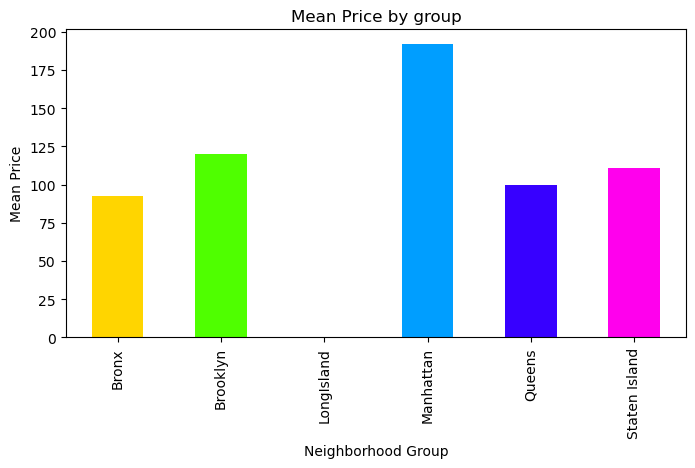

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("hsv", len(dfjoined["neighbourhood_group"].unique()))

dfjoined.set_index('neighbourhood_group')[' mean_price'].plot(kind="bar", figsize=(8,4), color=colors)

plt.title("Mean Price by group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Mean Price")
plt.show()


In [46]:
# Load data here
df = pd.read_csv("data/grammys.csv")
df

,year,category,nominee,workers,winner
0,1959,Album of the Year,The Music from Peter Gunn.,Henry Mancini,True
1,1959,Best Album Cover,Only the Lonely,Frank Sinatra (art director),True
2,1959,Best Arrangement,The Music From Peter Gunn,Henry Mancini (artist/arranger),True
3,1959,Best Classical Performance - Chamber Music (in...,Beethoven: Quartet 130,"The Hollywood String Quartet, Paul Shure (arti...",True
4,1959,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,Andrés Segovia,True
...,...,...,...,...,...
6318,2019,Record of the Year,Rockstar,"Post Malone (artist), 21 Savage (artist), Loui...",False
6319,2019,Song of the Year,This is America (Childish Gambino),"Ludwig Göransson (songwriter), Young Thug (son...",True
6320,2019,Song of the Year,The Joke (Brandi Carlile),"Brandi Carlile (songwriter), Dave Cobb (songwr...",False
6321,2019,Song of the Year,Boo'd Up (Ella Mai),"Ella Mai (songwriter), Larrance Dopson (songwr...",False


In [45]:
winner2016 = df[(df['year'] == 2016) & (df['category'] == "Album of the Year") & (df["winner"] == True)]
winner2016["workers"]

5505    Taylor Swift (artist/producer), Jack Antonoff ...
Name: workers, dtype: object

In [44]:
winnerRap2009 = df[(df["year"] == 2009) & (df["category"] == 'Best Rap Album') & (df["winner"] == True)]
winnerRap2009["workers"]

4396    Lil' Wayne
Name: workers, dtype: object

In [48]:
kendrickNominations = df[df["workers"].str.contains("Kendrick Lamar", case=False, na=False)]

total_nominations = kendrickNominations.shape[0]

total_wins = kendrickNominations[kendrickNominations["winner"] == True].shape[0]

print(f"Kenrick was nominated for {total_nominations} awards and won {total_wins}")

Kenrick was nominated for 20 awards and won 11


In [ ]:
from pandas_profiling import ProfileReport


In [49]:
%conda install pandas-profiling

Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/ahmadbasyouni/anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       hecd8cb5_0         128 KB
    certifi-2024.7.4           |  py311hecd8cb5_0         161 KB
    conda-24.7.1               |  py311hecd8cb5_0         1.3 MB
    confuse-1.5.0              |     pyhd3eb1b0_0          23 KB
    htmlmin-0.1.12             |     pyhd3eb1b0_1          24 KB
    imagehash-4.3.1            |  py311hecd8cb5_0         317 KB
    missingno-0.4.2            |     pyhd3eb1b0_1          15 KB
    pandas-profiling-2.9.0     |     pyhd3eb1b0_0         168 KB
    phik-0.12.3                |  py311ha357a0b_0         625 KB
    tangled-up-in-unicode-0.2.0|  py311hecd8cb5_0         5.4 MB
    visions-0.